In [1]:
from skimage.metrics import structural_similarity
from matplotlib import cm
from PIL import Image
import numpy as np
import glob
import cv2
import PIL
import os

In [2]:
HAAR_CASCADE_CLASSIFIER = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')  
MEME_PATH = r"F:\Computer Vision\SL Fake Monk Face Validation\images\Meme.jpg"

In [3]:
meme = cv2.imread(MEME_PATH)
gray_meme = cv2.cvtColor(meme, cv2.COLOR_BGR2GRAY)
face_rects = HAAR_CASCADE_CLASSIFIER.detectMultiScale(gray_meme, scaleFactor=1.2, minNeighbors=9, minSize=[50, 50])

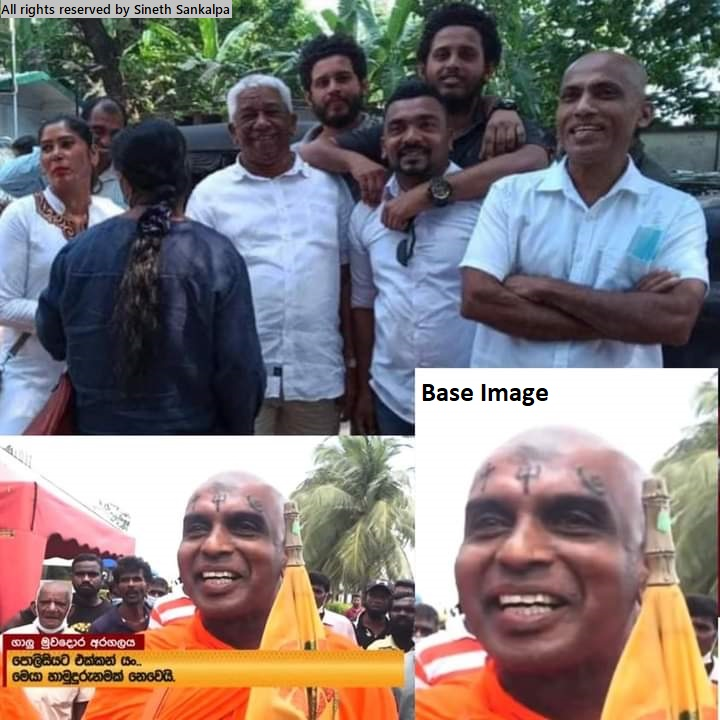

In [4]:
meme_pil = PIL.Image.fromarray(cv2.cvtColor(meme, cv2.COLOR_BGR2RGB))
meme_pil

In [5]:
meme_copy = meme.copy()

for x, y, w, h in face_rects:
    cv2.rectangle(meme_copy, (x, y), (x+w, y+h), (0, 255, 0), thickness=2)

Number of identified faces: 7


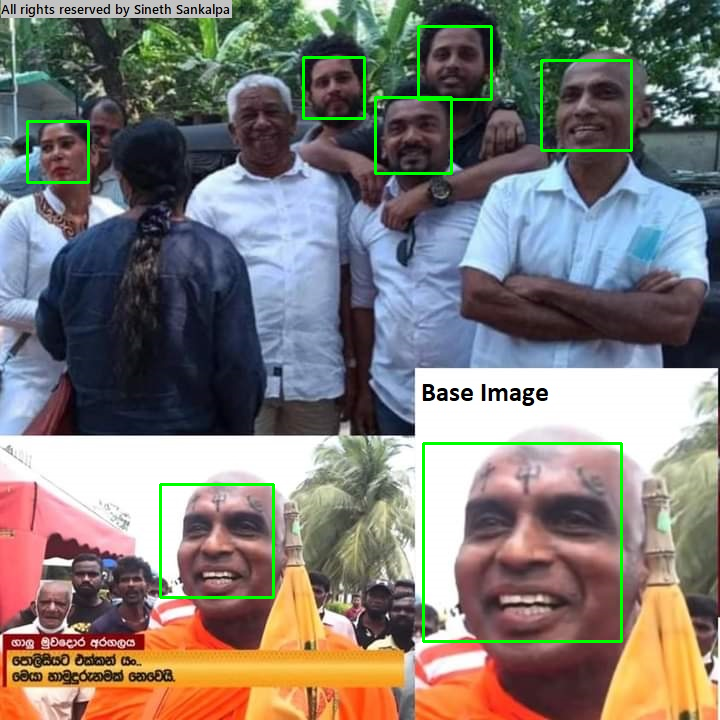

In [6]:
print("Number of identified faces:", face_rects.shape[0])

meme_pil = PIL.Image.fromarray(cv2.cvtColor(meme_copy, cv2.COLOR_BGR2RGB))
meme_pil

In [10]:
data_dir = r"F:\Computer Vision\SL Fake Monk Face Validation\images\data"

os.chdir(data_dir)
os.listdir()

for i, (x, y, w, h) in enumerate(face_rects):
    face = meme[y:y+h, x:x+w]
    cv2.imwrite("{}.jpg".format(i), face)

os.listdir()

['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg']

In [12]:
base_img_name = r"F:\Computer Vision\SL Fake Monk Face Validation\images\data\5.jpg"
test_img_names = [
    r"F:\Computer Vision\SL Fake Monk Face Validation\images\data\0.jpg",
    r"F:\Computer Vision\SL Fake Monk Face Validation\images\data\1.jpg",
    r"F:\Computer Vision\SL Fake Monk Face Validation\images\data\2.jpg",
    r"F:\Computer Vision\SL Fake Monk Face Validation\images\data\3.jpg",
    r"F:\Computer Vision\SL Fake Monk Face Validation\images\data\4.jpg",
    r"F:\Computer Vision\SL Fake Monk Face Validation\images\data\6.jpg"
]

In [13]:
RESIZE = (100, 100)
base_img = cv2.imread(base_img_name)
base_img = cv2.resize(base_img, (RESIZE[0], RESIZE[1]))
base_img_gray = cv2.cvtColor(base_img, cv2.COLOR_BGR2GRAY)
base_vs_test_struct_sim_scores = {}

for img_name in test_img_names:
    test_img = cv2.imread(img_name)
    test_img = cv2.resize(test_img, (RESIZE[0], RESIZE[1]))
    test_img_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    score, diff = structural_similarity(base_img_gray, test_img_gray, full=True)
    score = round(score * 100)
    base_vs_test_struct_sim_scores[img_name] = score

In [14]:
base_vs_test_struct_sim_scores

{'F:\\Computer Vision\\SL Fake Monk Face Validation\\images\\data\\0.jpg': 18,
 'F:\\Computer Vision\\SL Fake Monk Face Validation\\images\\data\\1.jpg': 18,
 'F:\\Computer Vision\\SL Fake Monk Face Validation\\images\\data\\2.jpg': 30,
 'F:\\Computer Vision\\SL Fake Monk Face Validation\\images\\data\\3.jpg': 81,
 'F:\\Computer Vision\\SL Fake Monk Face Validation\\images\\data\\4.jpg': 21,
 'F:\\Computer Vision\\SL Fake Monk Face Validation\\images\\data\\6.jpg': 21}

In [15]:
def extract_index_from_file_name(file_name):
    file_name = file_name.strip().split("\\")[-1]
    return int(file_name.split('.')[0])

In [16]:
detect_thresh = 25

# meme = cv2.imread(MEME_PATH)

for img in test_img_names:
    index = extract_index_from_file_name(img)
    x, y, w, h = face_rects[index]
    score = base_vs_test_struct_sim_scores[img]
    color = (0, 0, 255)
    status = "NORMAL"
    if score >= detect_thresh:
        color = (0, 255, 0)
        status = "FAKE MONK"
    cv2.rectangle(meme, (x, y), (x+w, y+h), color, thickness=2)
    cv2.rectangle(meme, (x,y-18), (x+w,y), color, thickness=-1)
    cv2.putText(meme, status, (x,y-2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

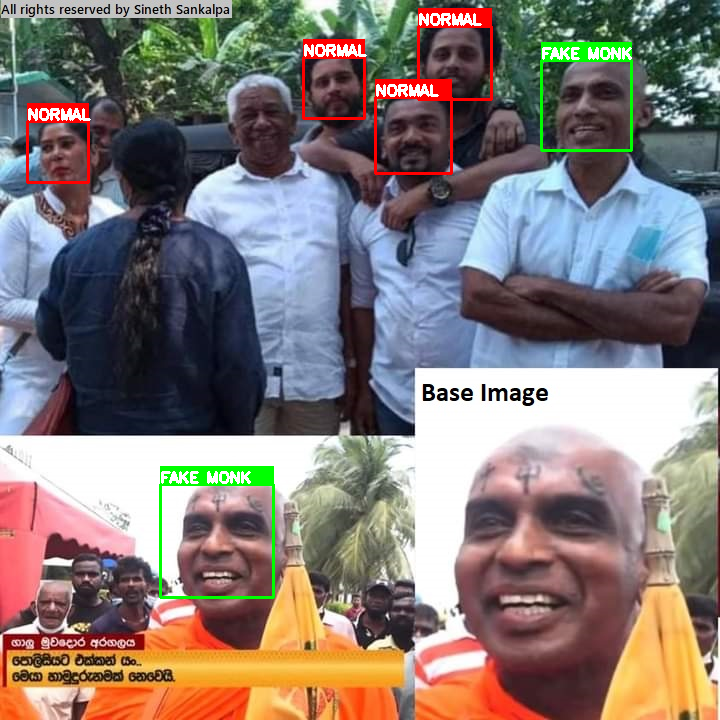

In [17]:
meme_pil = PIL.Image.fromarray(cv2.cvtColor(meme, cv2.COLOR_BGR2RGB))
meme_pil

In [18]:
save_dir = r"F:\Computer Vision\SL Fake Monk Face Validation\images"
os.chdir(save_dir)

meme_pil.save("meme_final.jpg")